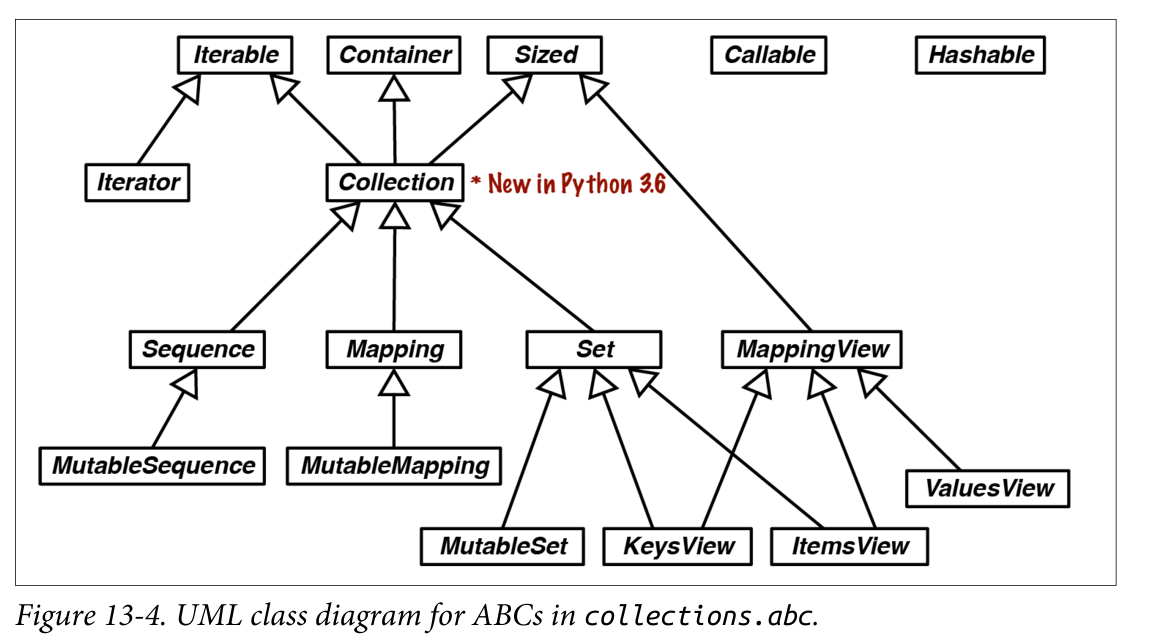

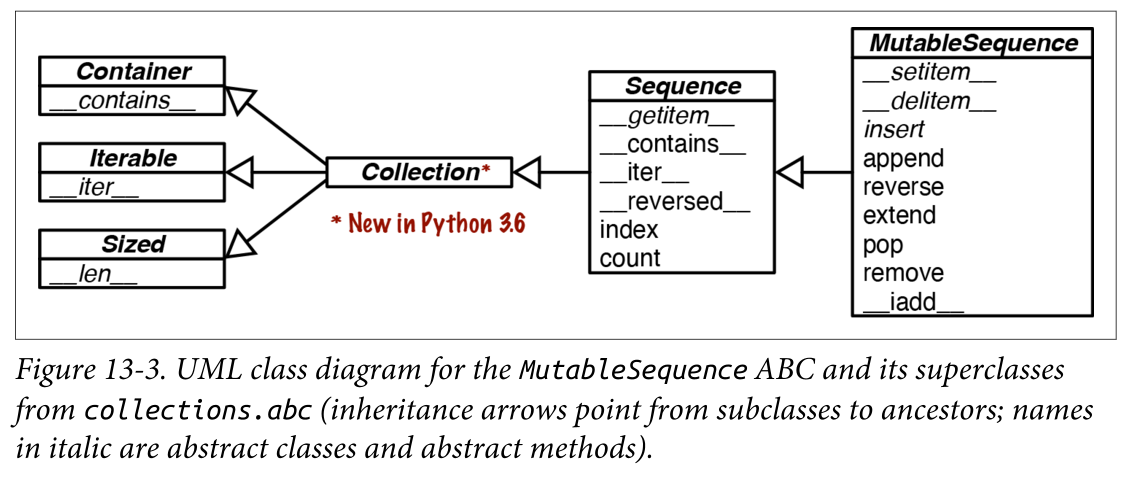

## Duck typing
We tend to care about the behaviour of objects much more tha type of objects. This focus on behavior instead of type is called duck typing.

Python's isinstance function checks whether an object is of a certain type or whether it's a subclass of that type.

For ABCs like Iterable, isinstance(obj, Iterable) does not only check inheritance.
It calls Iterable.__subclasshook__ which says:

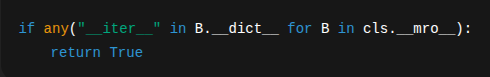

In [1]:
from collections.abc import Iterable

class A(Iterable):
    """Iterable inheriting from Iterable."""
    def __iter__(self):
        yield 1
        yield 2

class B:
    """Not an iterable."""

class C:
    """Iterable that doesn't inherit from Iterable."""
    def __iter__(self):
        yield 3
        yield 4

In [2]:
a = A()
isinstance(a, Iterable)

True

In [3]:
b = B()
isinstance(b, Iterable)

False

In [4]:
c = C()
isinstance(c, Iterable)

True

## Subclassing a ABC

In [ ]:
from collections import namedtuple, abc

Card = namedtuple('Card', ['rank', 'suit'])
class FrenchDeck2(abc.MutableSequence): 
    ranks = [str(n) for n in range(2, 11)] + list('JQKA') 
    suits = 'spades diamonds clubs hearts'.split()
def __init__(self): 
    self._cards = [Card(rank, suit)
def __len__(self): 
    return len(self._cards)
def __getitem__(self, position): 
    return self._cards[position]
f           or suit in self.suits for rank in self.ranks]
def __setitem__(self, position, value):
    self._cards[position] = value
def __delitem__(self, position):
    del self._cards[position]
def insert(self, position, value):
    self._cards.insert(position, value)

Python ABCs support nominal subtyping (inheritance) and structural subtyping (duck typing).

Sometimes, we want a class to be considered a subclass of an ABC without inheriting from it.

We can achieve this by registering the class using the ABC’s .register() method.

This is useful for third-party classes you cannot modify but want to treat as part of your hierarchy.

In [ ]:
from collections.abc import Iterable

class MyClass:
    """No __iter__, so not an Iterable"""
    pass

print(isinstance(MyClass(), Iterable))  
print(issubclass(MyClass, Iterable))    

# Register as virtual subclass
Iterable.register(MyClass)

print(isinstance(MyClass(), Iterable))  
print(issubclass(MyClass, Iterable))   


False
False
True
True
